In [197]:
import requests
import re
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
from fa2 import ForceAtlas2
import seaborn as sns
import numpy as np
from pprint import pprint
import pickle
import re
import string
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.set()

# Get Dataframe with espiodes

In [136]:
url = 'https://southpark.fandom.com/wiki/List_of_Episodes'
page = pd.read_html(url)

In [137]:
len(page)

34

In [138]:
def get_episodes_df(page):
    def clear_df(df):
        df_tmp = df.drop([0], axis=1)
        df_tmp.columns = df_tmp.loc[0].values
        df_tmp = df_tmp.drop([0])
        df_clean = df_tmp[(df_tmp['#'].str.isnumeric() == True) | (df_tmp['#'].isna() == True)].copy()
        df_clean['Title'] = df_clean['Title'].str.replace('\"', '')
        df_clean = df_clean[df_clean['Title'] != 'TBA']
        descriptions = [df_tmp.loc[i+1].values[0] for i in df_clean.index]
        df_clean['Descriptions'] = descriptions
        df_clean.reset_index(drop=True, inplace=True)
        return df_clean
    
    df_list = []

    for i, df_tmp in enumerate(page[4:28], start=1):
        df_tmp = clear_df(df_tmp)
        df_tmp['Season'] = i
        df_list.append(df_tmp)

    df_episodes = pd.concat(df_list, ignore_index=True)
    return df_episodes

In [139]:
df_episodes = get_episodes_df(page)

In [141]:
df_episodes.tail(20)

,Title,Air Date,Code,#,Descriptions,Season
289,The Problem with a Poo,"October 10, 2018",2203,290,Mr. Hankey’s offensive behavior puts him in je...,22
290,Tegridy Farms,"October 17, 2018",2204,291,Butters is selling vape pens and all kinds of ...,22
291,The Scoots,"October 31, 2018",2205,292,The kids plan to use the latest revolution in ...,22
292,Time To Get Cereal,"November 7, 2018",2206,293,When dead citizens start popping up all over t...,22
293,Nobody Got Cereal?,"November 14, 2018",2207,294,The boys break out of jail and are on the run ...,22
294,Buddha Box,"November 28, 2018",2208,295,Cartman just can’t deal with people any longer...,22
295,Unfulfilled,"December 5, 2018",2209,296,The citizens of South Park are enjoying all th...,22
296,Bike Parade,"December 12, 2018",2210,297,Despite the chaos at the Amazon Fulfillment Ce...,22
297,Mexican Joker,"September 25, 2019",2301,298,"In the pilot episode of the new hit series, Te...",23
298,Band in China,"October 2, 2019",2302,299,Randy lands himself in big trouble on a visit ...,23


# Get episodes scripts

In [118]:
def read_scripts(df_episodes):
    def clear_script(script):
        if script.shape[1] > 2:
            df_tmp = script[[0, 1]].copy()
        else:
            df_tmp = script.copy()
        df_tmp.drop([0,1], inplace=True)
        df_tmp.columns = ['Character', 'Lines']
        return df_tmp
    
    scripts = {}
    valid = {}
    for row in df_episodes.iterrows():
        title = row[1]['Title'].replace(' ', '_')
        title = title.replace('%', '%25')
        title = title.replace('!!!', '')
        title = title.replace('#', '')
        title = title.replace('\'', '%27')
        title = title.replace('?', '%3F')
        if title == 'Imaginationland_Episode_I':
            title = 'Imaginationland'
        elif title == 'Imaginationland_Episode_II':
            title == ' Imaginationland,_Episode_II'
        elif title == 'Crème_Fraiche':
            title == 'Crème_Fraiche'
        code = row[1]['Code']
        if code == '1414':
            continue
        print(f'{code}: {title}')
        url_tmp = f'https://southpark.fandom.com/wiki/{title}/Script'
        script_raw = pd.read_html(url_tmp)
        scripts[code] = clear_script(script_raw[1])
        valid[code] = (len(script_raw), scripts[code].shape)
    return scripts, valid

In [119]:
scripts,valid = read_scripts(df_episodes)

101: Cartman_Gets_an_Anal_Probe
102: Weight_Gain_4000
103: Volcano
104: Big_Gay_Al%27s_Big_Gay_Boat_Ride
105: An_Elephant_Makes_Love_to_a_Pig
106: Death
107: Pinkeye
109: Starvin%27_Marvin
110: Mr._Hankey,_the_Christmas_Poo
108: Damien
111: Tom%27s_Rhinoplasty
112: Mecha-Streisand
113: Cartman%27s_Mom_is_a_Dirty_Slut
201: Terrance_and_Phillip_in_Not_Without_My_Anus
202: Cartman%27s_Mom_is_Still_a_Dirty_Slut
204: Ike%27s_Wee_Wee
203: Chickenlover
205: Conjoined_Fetus_Lady
206: The_Mexican_Staring_Frog_of_Southern_Sri_Lanka
207: City_on_the_Edge_of_Forever_(Flashbacks)
208: Summer_Sucks
209: Chef%27s_Chocolate_Salty_Balls
210: Chickenpox
211: Roger_Ebert_Should_Lay_off_the_Fatty_Foods
212: Clubhouses
213: Cow_Days
214: Chef_Aid
215: Spookyfish
216: Merry_Christmas_Charlie_Manson!
217: Gnomes
218: Prehistoric_Ice_Man
301: Rainforest_Shmainforest
302: Spontaneous_Combustion
303: The_Succubus
305: Jakovasaurs
304: Tweek_vs._Craig
306: Sexual_Harassment_Panda
307: Cat_Orgy
308: Two_Guys_Nake

In [161]:
# Manually downloaded script for episode 1414
df_1414 = pd.read_csv('1414.txt', sep='|', names=['Character', 'Lines'])
df_1414['Character'].replace('ScriptScene', np.NaN, inplace=True)
scripts['1414'] = df_1414

In [162]:
scripts['1414']

,Character,Lines
0,NaN,"The Marsh house, living room, night. Randy and..."
1,Reporter,Passenger said the Carnival cruise line smelle...
2,Sharon,"''[yawns]'' All right, it's late. I'm gonna ca..."
3,Randy,"Aw, you know, I can't really sleep. I'm just g..."
4,Sharon,"''[going up stairs, she stops and turns around..."
...,...,...
251,Sharon,"Shake Weight, you aren't really workout equipm..."
252,Shake Weight,Marriage is important. Keep your man happy. Wh...
253,Sharon,"I'll remember that now, thanks to you."
254,Shake Weight,It has been nice getting to know you. How abou...


In [164]:
with open('scripts.pickle', 'wb') as file:
    pickle.dump(scripts, file, protocol=pickle.HIGHEST_PROTOCOL)

# Text processing 

In [253]:
import nltk
from nltk import WordPunctTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [254]:
def delete_names(text, name_list):
    text_tmp = text
    for name in name_list:
        text_tmp = text_tmp.replace(' ' + name, '')
    return text_tmp

def clear_text(text, names, names_2_parts):
    text = re.sub("[\[].*?[\]]", "", text)
    text = delete_names(text, names_2_parts)
    tk = WordPunctTokenizer()
    lemmatizer = WordNetLemmatizer()
    text_tokenized = tk.tokenize(text)
    black_list = names + stopwords.words()
    black_list2 = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '0']+ list(string.punctuation) + ['—', '".']
    text_tokenized = [lemmatizer.lemmatize(w.lower()) for w in text_tokenized if w.lower() not in black_list]
    text_tokenized = [w for w in text_tokenized if any(ban_char in w for ban_char in black_list2)==False]
    return text_tokenized

In [255]:
names = []
for code in df_episodes['Code'].values:
    names = names + list(scripts[code].Character.dropna().unique())
names = list(set(names))
names_2_parts = [name for name in names if len(name.split()) >= 2]
names = [name.lower() for name in names if name not in names_2_parts]

In [256]:
main_character = ['Cartman', 'Kenny', 'Kyle', 'Stan']

In [270]:
main_character_lines = []
for character in main_character:
    for episode in df_episodes.Code.values:
        text = ' '.join(scripts[episode][scripts[episode].Character == character].Lines.dropna().values)
        data = {'Character' : character,
               'Episode': episode,
               'Clean_text': [clear_text(text, names, names_2_parts)]}
        main_character_lines.append(pd.DataFrame(data=data))
df_char_lines = pd.concat(main_character_lines, ignore_index=True)

In [271]:
df_char_lines

,Character,Episode,Clean_text
0,Cartman,101,"[know, mean, telling, yeah, little, brother, o..."
1,Cartman,102,"[ugh, hate, thing, well, know, sitting, mindin..."
2,Cartman,103,"[okay, sick, drive, drive, drive, car, damn, d..."
3,Cartman,104,"[eh, making, sick, way, know, toughest, south,..."
4,Cartman,105,"[hey, get, black, eye, sister, beat, huh, eheh..."
...,...,...,...
1231,Stan,2308,"[talking, yeah, want, realize, get, game, chri..."
1232,Stan,2309,"[pc, hell, mean, happening, let, hurry, get, u..."
1233,Stan,2310,[]
1234,Stan,2401,"[school, freakin, joke, even, learning, anythi..."


# Sentiment analysis 

In [278]:
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/wojtek/nltk_data...


In [281]:
' '.join(df_char_lines.Clean_text.loc[0])

'know mean telling yeah little brother ow cause bogus nightmare well dreamt lying bed dark sudden bright blue light filled room slowly bedroom began open next thing remember hallway weeaak lying table scary alien wanted operate big head big black eye dream said oh shut guy trying make scared working kick as huh eh dream fat big boned oh oh uh mean eh would shut dildo oh damn anything as dream shut shut guy working heh baking brownie heh heh little joke heh heh hah hah yelled ow as uh ow as dream fine oh whoa sure hungry shut totally immature want i testabur ger fat obviously like throw every time talk slip tongue making oh see going join little joke huh oh guy sure going long way try scare salisbury steak oh guy as seriously would could bitch uh would stop going little brother know dream know anal probe know control love singa moona june springa love singa sky blue tea two ah bitch guy shut control uh hey ow hurt buttlicker dead shut guy damn anal probe screw guy goin home dildo hi wel

In [279]:
sid=SentimentIntensityAnalyzer()

In [282]:
sid.polarity_scores(' '.join(df_char_lines.Clean_text.loc[0]))

{'neg': 0.241, 'neu': 0.571, 'pos': 0.188, 'compound': -0.9818}

In [284]:
df_char_lines['Sentiment_Scores'] = df_char_lines['Clean_text'].apply(lambda x: sid.polarity_scores(' '.join(x)))

In [288]:
df_char_lines = pd.concat([df_char_lines, df_char_lines['Sentiment_Scores'].apply(pd.Series)], axis=1)

In [292]:
df_char_lines

,Character,Episode,Clean_text,Sentiment_Scores,neg,neu,pos,compound
0,Cartman,101,"[know, mean, telling, yeah, little, brother, o...","{'neg': 0.241, 'neu': 0.571, 'pos': 0.188, 'co...",0.241,0.571,0.188,-0.9818
1,Cartman,102,"[ugh, hate, thing, well, know, sitting, mindin...","{'neg': 0.161, 'neu': 0.541, 'pos': 0.298, 'co...",0.161,0.541,0.298,0.9895
2,Cartman,103,"[okay, sick, drive, drive, drive, car, damn, d...","{'neg': 0.27, 'neu': 0.525, 'pos': 0.205, 'com...",0.270,0.525,0.205,-0.9615
3,Cartman,104,"[eh, making, sick, way, know, toughest, south,...","{'neg': 0.179, 'neu': 0.697, 'pos': 0.125, 'co...",0.179,0.697,0.125,-0.8402
4,Cartman,105,"[hey, get, black, eye, sister, beat, huh, eheh...","{'neg': 0.182, 'neu': 0.634, 'pos': 0.185, 'co...",0.182,0.634,0.185,0.1956
...,...,...,...,...,...,...,...,...
1231,Stan,2308,"[talking, yeah, want, realize, get, game, chri...","{'neg': 0.068, 'neu': 0.675, 'pos': 0.257, 'co...",0.068,0.675,0.257,0.7184
1232,Stan,2309,"[pc, hell, mean, happening, let, hurry, get, u...","{'neg': 0.217, 'neu': 0.566, 'pos': 0.217, 'co...",0.217,0.566,0.217,-0.2500
1233,Stan,2310,[],"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000
1234,Stan,2401,"[school, freakin, joke, even, learning, anythi...","{'neg': 0.148, 'neu': 0.592, 'pos': 0.26, 'com...",0.148,0.592,0.260,0.9854


In [293]:
df_char_lines.groupby(['Character']).agg({'compound':['mean'], 'neg':['mean'], 'neu':['mean'], 'pos':['mean']})

,compound,neg,neu,pos
,mean,mean,mean,mean
Character,,,,
Cartman,0.295544,0.173275,0.541013,0.237149
Kenny,0.065584,0.096003,0.291819,0.168809
Kyle,0.104280,0.183181,0.533110,0.228715
Stan,0.223923,0.167350,0.529385,0.241780


In [295]:
df_char_lines['Episode_Numeric'] = df_char_lines['Episode'].astype('int64')

In [336]:
df_char_lines[df_char_lines.Character == 'Kenny'].compound.values

array([-0.3595,  0.    ,  0.4641, -0.5859,  0.4939,  0.0258,  0.    ,
        0.5106, -0.34  , -0.3818,  0.2023,  0.296 , -0.4215,  0.    ,
       -0.8658,  0.    ,  0.    ,  0.    , -0.9153,  0.5994,  0.    ,
        0.0258, -0.4404,  0.2263, -0.1027, -0.5574,  0.    ,  0.    ,
        0.4215, -0.5267, -0.7845,  0.9352,  0.6581, -0.5574,  0.    ,
        0.25  ,  0.5106,  0.    ,  0.    , -0.4133,  0.8074, -0.5423,
       -0.4215, -0.1027,  0.5106,  0.    ,  0.9421,  0.0772,  0.2732,
       -0.5574,  0.7579,  0.9756,  0.9313, -0.785 , -0.765 , -0.3566,
       -0.7964,  0.4019,  0.7096,  0.    ,  0.    ,  0.    ,  0.6808,
        0.8779,  0.743 ,  0.296 ,  0.6808,  0.    ,  0.3182,  0.6249,
        0.3182,  0.296 ,  0.8271, -0.8779, -0.5859,  0.    ,  0.    ,
        0.9678,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.4215,
        0.    ,  0.    ,  0.    ,  0.    ,  0.296 ,  0.7783,  0.    ,
        0.25  ,  0. 

<BarContainer object of 309 artists>

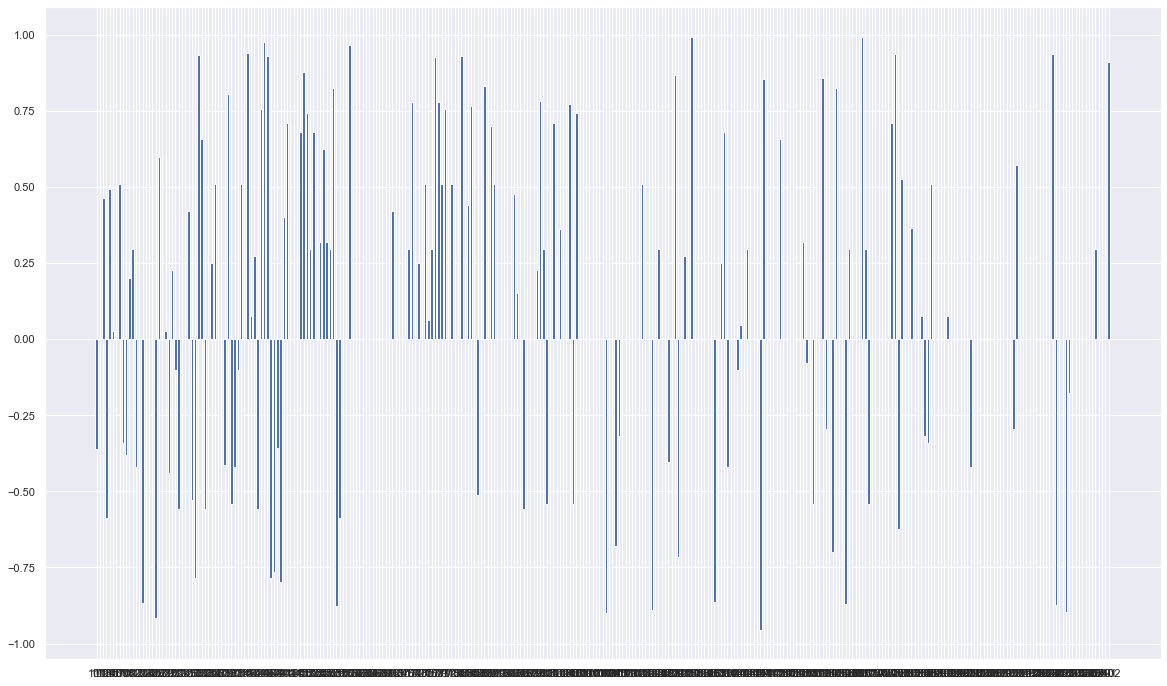

In [335]:
plt.figure(figsize=(20,12))
plt.bar(df_char_lines[df_char_lines.Character == 'Kenny'].Episode, df_char_lines[df_char_lines.Character == 'Kenny'].compound)

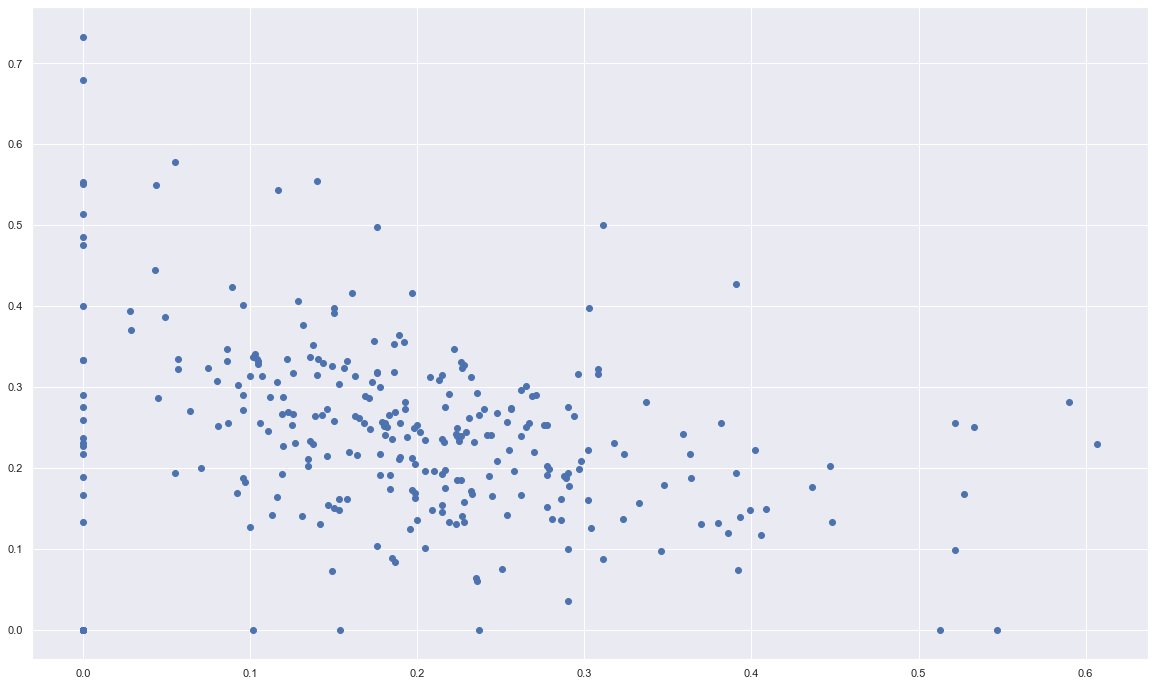

In [334]:
plt.figure(figsize=(20,12))
plt.scatter(df_char_lines[df_char_lines.Character == 'Kyle'].neg, df_char_lines[df_char_lines.Character == 'Kyle'].pos)

In [302]:
df_char_lines[df_char_lines.Character == 'Cartman'].Episode_Numeric

0       101
1       102
2       103
3       104
4       105
       ... 
304    2308
305    2309
306    2310
307    2401
308    2402
Name: Episode_Numeric, Length: 309, dtype: int64

In [337]:
df_char_lines[df_char_lines.Character == 'Kenny']

,Character,Episode,Clean_text,Sentiment_Scores,neg,neu,pos,compound,Episode_Numeric
309,Kenny,101,"[oh, nooo, look, foot, touch, worry, alright, ...","{'neg': 0.31, 'neu': 0.552, 'pos': 0.138, 'com...",0.310,0.552,0.138,-0.3595,101
310,Kenny,102,"[big, biggest, breast, seen, oh]","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,102
311,Kenny,103,"[maybe, suck, hey, little, like, vagina, thank...","{'neg': 0.265, 'neu': 0.36, 'pos': 0.374, 'com...",0.265,0.360,0.374,0.4641,103
312,Kenny,104,"[oh, think, screwing, check, think, said, gay,...","{'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...",0.444,0.556,0.000,-0.5859,104
313,Kenny,105,"[hey, guy, talked, told, almost, mmmmmm, gonna...","{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",0.000,0.824,0.176,0.4939,105
...,...,...,...,...,...,...,...,...,...
613,Kenny,2308,"[yeah, anything, morrow, got, flushing]","{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.000,0.645,0.355,0.2960,2308
614,Kenny,2309,[],"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000,2309
615,Kenny,2310,[],"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000,2310
616,Kenny,2401,[],"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.000,0.000,0.000,0.0000,2401


# Sandbox

In [326]:
url_tmp = 'https://southpark.fandom.com/wiki/The_Scoots/Script'
script_raw = pd.read_html(url_tmp)

In [329]:
script_raw[1]

,0,1
0,The Scoots,The Scoots
1,NaN,NaN
2,NaN,An October afternoon in South Park. An adult n...
3,Adult Kenny,October was always my favorite month. [Stan an...
4,Mr. Mackey,Whoa! [trips over something and falls down] Wh...
...,...,...
228,Adult Kenny,Mr. Mackey was able to get back to the town an...
229,The boys,[approach a house and ring the doorbell] Trick...
230,Kenny,[brightly] (Trick or treat!)
231,Adult Kenny,It was the last Halloween that still felt like...
